In [1]:
#unsupervised machine learning



In [2]:
#imports
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.1
Pandas: 1.0.1
matplotlib: 3.1.3
seaborn: 0.10.0
scipy: 1.4.1
sklearn: 0.22.1


In [3]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [5]:
#explore the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(data.shape)

(284807, 31)


In [7]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [8]:
data=data.sample(frac=0.6, random_state=1) # only going to use 10% of the data

print(data.shape)

(170884, 31)


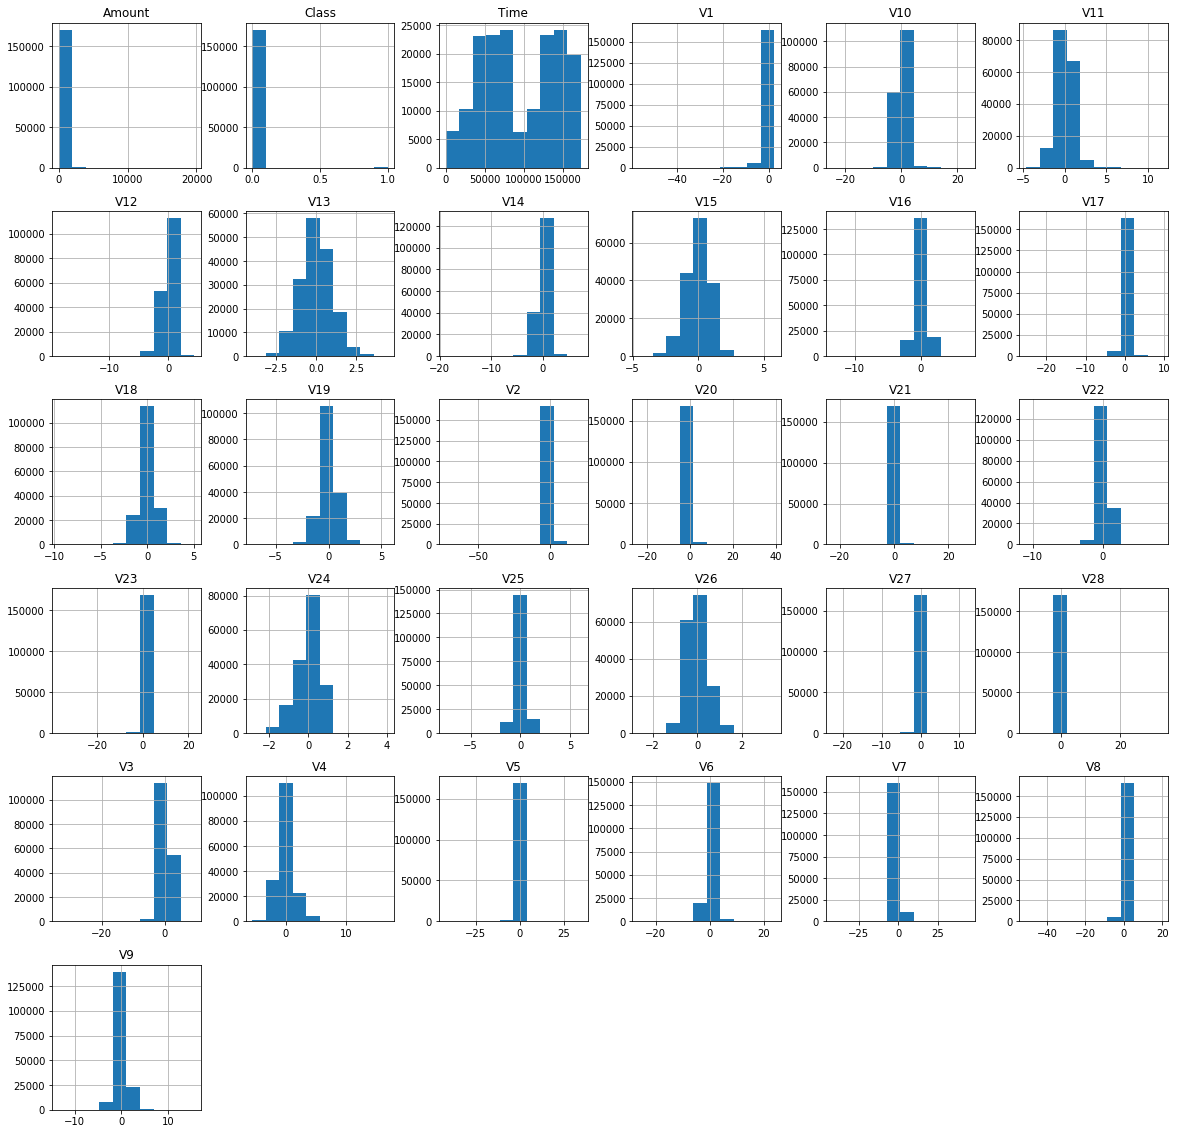

In [9]:
#plot histogram of each parameter
data.hist(figsize= (20,20))
plt.show()

In [10]:
#Determine the number of fraud cases in the dataset
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]

outlier_fraction= len(Fraud)/ float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid cases: {}'.format(len(Valid)))

0.0016999425536654278
Fraud Cases: 290
Valid cases: 170594


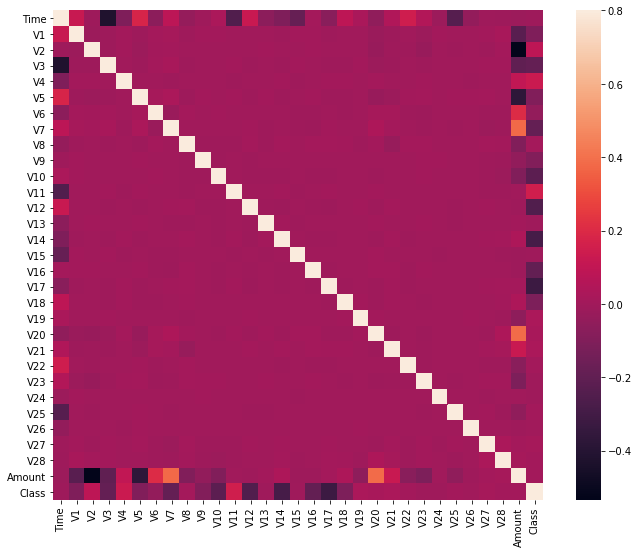

In [11]:
#correlation matrix
corrmat=data.corr()
fig = plt.figure(figsize= (12,9))

sns.heatmap(corrmat, vmax=.8, square= True)
plt.show()

In [12]:
# Get all the columns from the DataFrame

#Generate list of columns
columns=data.columns.tolist()

#Filter the columns to remove data we do not want
columns= [c for c in columns if c not in ["Class"]] # take out class to make this an unsupervised learning problem

#store the variable we'll be predicting on
target="Class" #tries to make up a class prediction

X=data[columns]
Y=data[target]

#print the shapes of X and Y
print(X.shape)
print(Y.shape)


#should have enough data preprocessing to build the models

(170884, 30)
(170884,)


In [13]:
#import packages 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor #read more about these methods important to understand the algorithms we use
#we're comparing these two algorithms 

#define a random state
state= 1

#define the outlier detection methods in a dictionary
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X), 
                                       contamination = outlier_fraction,
                                       random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [14]:
#Fit the model
n_outliers = len(Fraud)

#do a for loop through both of the classifiers above
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred= clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred !=Y).sum()
    
    #Run the classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest: 395
0.9976884904379579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170594
           1       0.32      0.32      0.32       290

    accuracy                           1.00    170884
   macro avg       0.66      0.66      0.66    170884
weighted avg       1.00      1.00      1.00    170884

Local Outlier Factor: 561
0.9967170712296061
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170594
           1       0.03      0.03      0.03       290

    accuracy                           1.00    170884
   macro avg       0.52      0.52      0.52    170884
weighted avg       1.00      1.00      1.00    170884



In [15]:
# can see that the precision is low which means not many fraudlent cases were actually being detected 17:00 minutes

# we could take a larger sample of data but it will be computationally expensive
#Isolation forest works better as it detects 30%
#could use neural networks 